In [37]:
import os
from do_mpc.data import load_results
import numpy as np
import pandas as pd

# S = 50
K = 5

In [38]:
def extract_data(path):
    df = load_results(path)
    sim_data = df['simulator']
    mpc_data = df['mpc']
    mhe_data = df['estimator']

    # Extract data from do-mpc data structures
    _t = mhe_data['_time']
    x_est = mhe_data['_x', 'x']
    x_true = sim_data['_x', 'x']
    #h = mhe_data['_u', 'h']
    h = sim_data['_u', 'h']
    h_optimal = mpc_data['_u', 'h']
    performance_true = sim_data['_aux', 'performance']
    performance_est = mhe_data['_aux', 'performance']

    return _t, x_est, x_true, h, h_optimal, performance_true, performance_est

def array_to_class(data):
    entries = np.array([])
    for datum in data:
        entry = Entry(datum)
        entries = np.append(entries, entry)
    return entries

In [39]:
class Entry():
    def __init__(self, datum):
        self.datum = datum

In [40]:
#result_path = './results/001_sim_question_selector.pkl'
result_path = 'src/simulations/mpc_mhe_model/average_student_0.pkl'
frames = []
columns = ['x_est', 'x_true', 'u', 'u_optimal', 'y_true', 'y_est']
_t, x_est, x_true, h, h_optimal, performance_true, performance_est = extract_data(result_path)

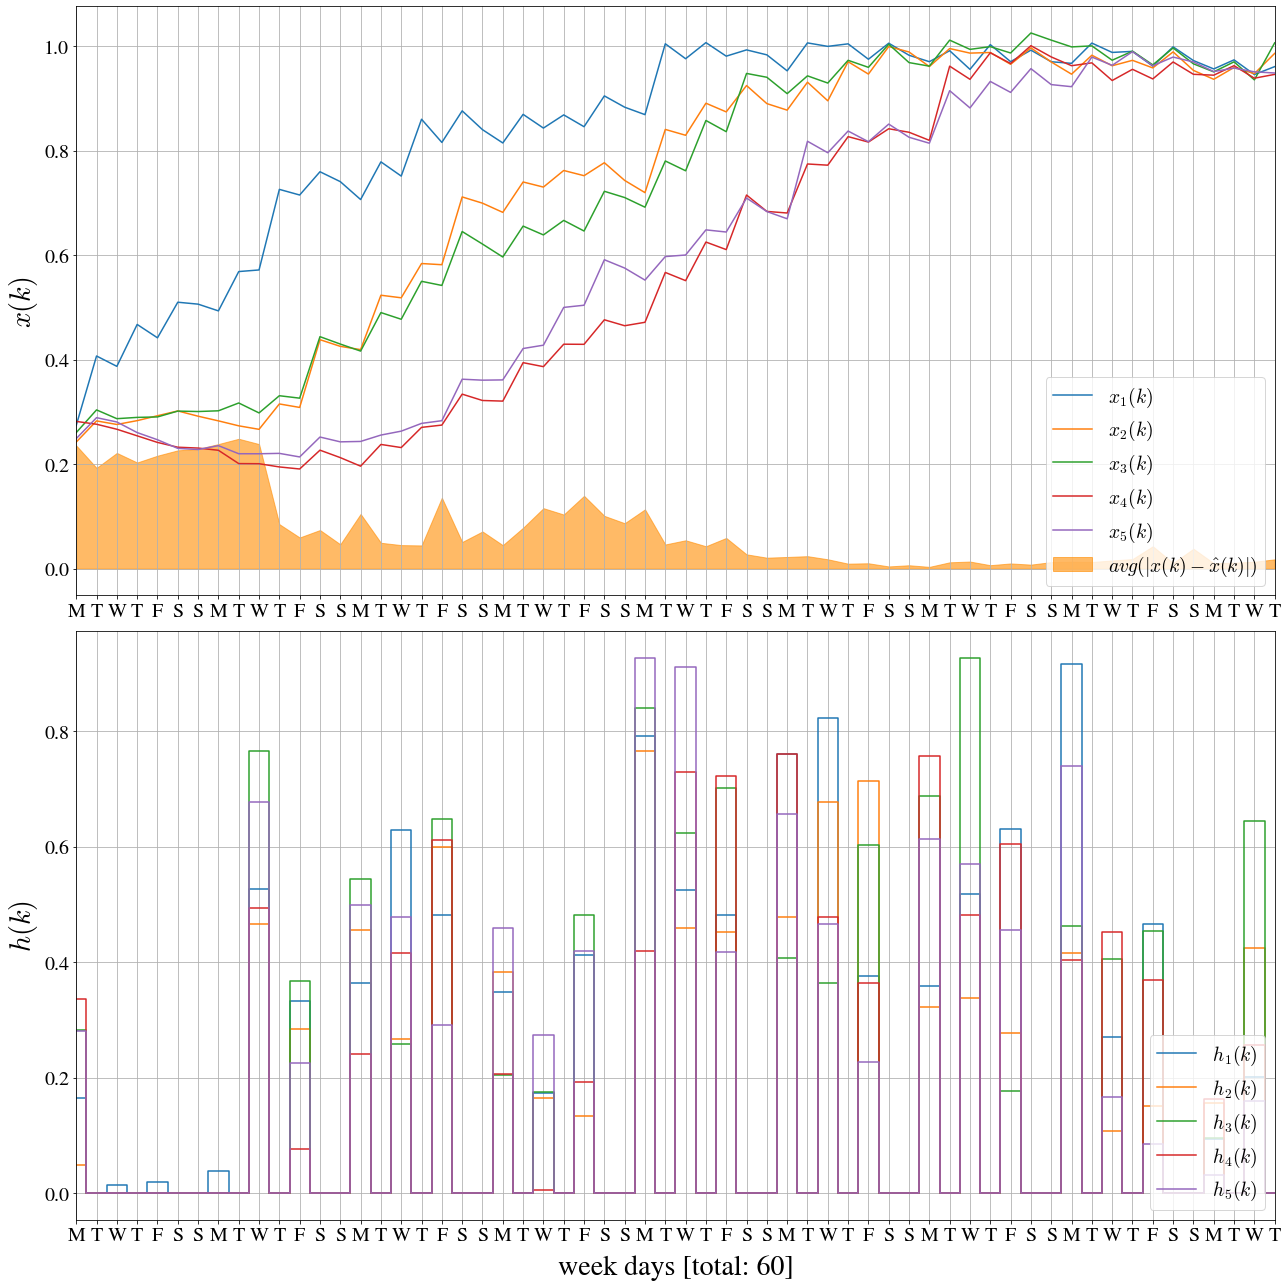

In [41]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 28
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.xmargin'] = 0
xticks = ['M','T','W','T','F','S','S']*9
xticks = xticks[:-3]

fig, ax = plt.subplots(2,1, figsize=(18,18))
#fig = plt.figure(figsize=(16,9))
'''
for i in range(K):
    ax[0].plot(x_est[:,i], label='$\hat{x}$'+f'$_%i(k)$'%(i+1))
ax[0].fill_between(x=np.arange(len(x_est)), y1=np.zeros(len(x_est)), y2=np.mean(abs(x_est - x_true), axis=1), color='darkorange', alpha=0.6, label='$avg(|x(k)-\hat{x}(k)|)$')
ax[0].set_xticks(np.arange(60))
ax[0].set_xticklabels(xticks)
ax[0].set_ylabel('$\hat{x}(k)$')
ax[0].legend(loc='lower right', fontsize='x-small')
'''
for i in range(K):
    ax[0].plot(x_true[:,i], label='$x$'+f'$_%i(k)$'%(i+1))
ax[0].fill_between(x=np.arange(len(x_true)), y1=np.zeros(len(x_true)), y2=np.mean(abs(x_est - x_true), axis=1), color='darkorange', alpha=0.6, label='$avg(|x(k)-\hat{x}(k)|)$')
ax[0].set_xticks(np.arange(60))
ax[0].set_xticklabels(xticks)
ax[0].set_ylabel('$x(k)$')
ax[0].legend(loc='lower right', fontsize='x-small')
#'''
for i in range(K):
    ax[1].plot(h[:,i], label='$h$'+f'$_%i(k)$'%(i+1), drawstyle='steps-mid')
#ax[0].fill_between(x=np.arange(len(x_est)), y1=np.zeros(len(x_est)), y2=np.mean(abs(x_est - x_true), axis=1), color='darkorange', alpha=0.6, label='$|x(k)-\hat{x}(k)|$')
ax[1].set_xticks(np.arange(60))
ax[1].set_xticklabels(xticks)
ax[1].set_ylabel('$h(k)$')
ax[1].set_xticks(np.arange(60))
ax[1].set_xticklabels(xticks)
ax[1].legend(loc='lower right', fontsize='x-small')
ax[1].set_xlabel('week days [total: 60]', labelpad=10)


# ax[2].plot(T_est, label='$\hat{performance}(k)$', drawstyle='steps-mid')
# #ax[2].plot(T_true, label='$performance(k)$', drawstyle='steps-mid')
# #ax[0].fill_between(x=np.arange(len(x_est)), y1=np.zeros(len(x_est)), y2=np.mean(abs(x_est - x_true), axis=1), color='darkorange', alpha=0.6, label='$|x(k)-\hat{x}(k)|$')
# ax[2].set_xticks(np.arange(60))
# ax[2].set_xticklabels(xticks)
# ax[2].set_ylabel('$Performance(k)$')
# ax[2].set_xticks(np.arange(60))
# ax[2].set_xticklabels(xticks)
# ax[2].legend(loc='lower right', fontsize='x-small')

fig.tight_layout(pad=0.4)


In [46]:
9*3/2

13.5

Text(0.5, 1.0, '(b)')

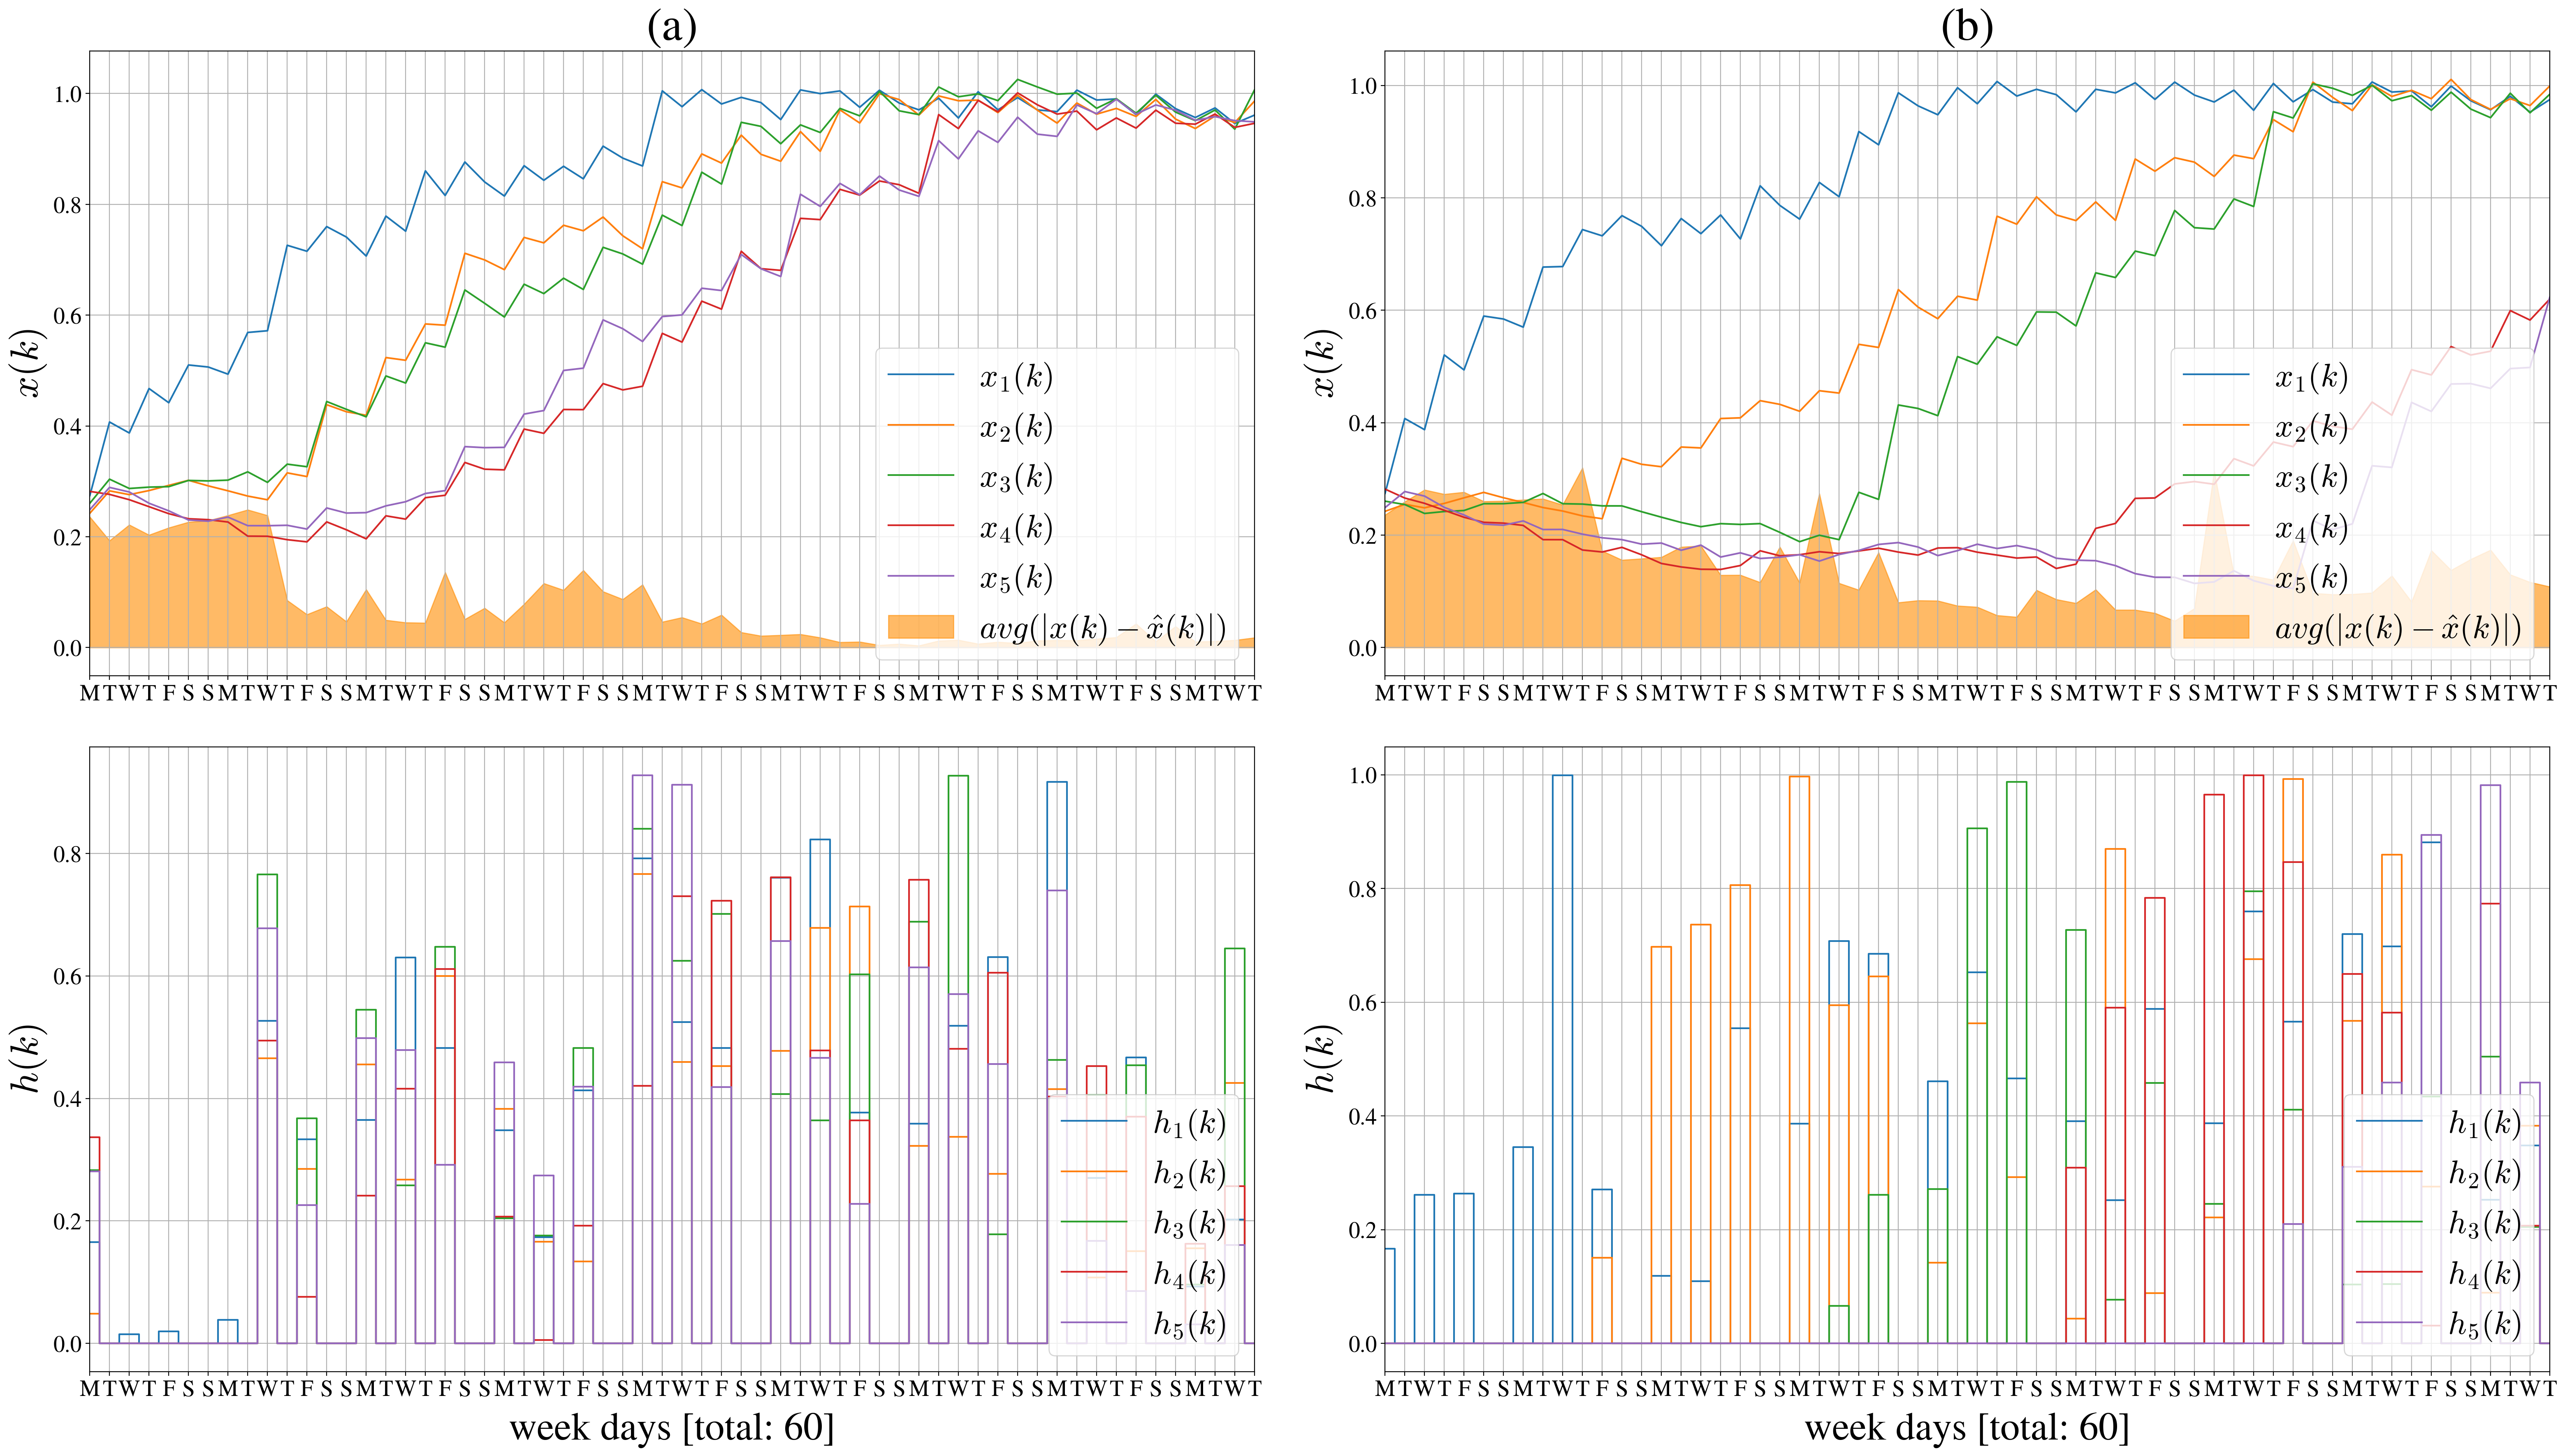

In [54]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 34
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.xmargin'] = 0
fig, ax = plt.subplots(2,2, figsize=(32,18), dpi=200)
for m, model in enumerate(['src/simulations/mpc_mhe_model/average_student_0.pkl','src/simulations/benchmark_schedule/average_student_0.pkl']):
    result_path = model#'./benchmark_random/student_8.pkl'
    _t, x_est, x_true, h, h_optimal, performance_true, performance_est = extract_data(result_path)

    for i in range(K):
        ax[0][m].plot(x_true[:,i], label='$x$'+f'$_%i(k)$'%(i+1))
    ax[0][m].fill_between(x=np.arange(len(x_true)), y1=np.zeros(len(x_true)), y2=np.mean(abs(x_est - x_true), axis=1), color='darkorange', alpha=0.6, label='$avg(|x(k)-\hat{x}(k)|)$')
    ax[0][m].set_xticks(np.arange(60))
    ax[0][m].set_xticklabels(xticks)
    ax[0][m].set_ylabel('$x(k)$')
    ax[0][m].legend(loc='lower right', fontsize='small')
    #'''
    for i in range(K):
        ax[1][m].plot(h[:,i], label='$h$'+f'$_%i(k)$'%(i+1), drawstyle='steps-mid')
    #ax[0].fill_between(x=np.arange(len(x_est)), y1=np.zeros(len(x_est)), y2=np.mean(abs(x_est - x_true), axis=1), color='darkorange', alpha=0.6, label='$|x(k)-\hat{x}(k)|$')
    ax[1][m].set_xticks(np.arange(60))
    ax[1][m].set_xticklabels(xticks)
    ax[1][m].set_ylabel('$h(k)$')
    ax[1][m].set_xticks(np.arange(60))
    ax[1][m].set_xticklabels(xticks)
    ax[1][m].legend(loc='lower right', fontsize='small')
    ax[1][m].set_xlabel('week days [total: 60]', labelpad=10)
  
fig.tight_layout()
ax[0][0].set_title('(a)', pad=10)
ax[0][1].set_title('(b)', pad=10)

In [31]:
_t

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.],
       [51.],
       [52.],
       [53.],
       [54.],
       [55.],
       [56.],
       [57.],
       [58.],
       [59.]])

In [17]:
fig.savefig("Learning trajectories - average student - mhe.png")
#fig.savefig("Learning trajectories - average student - sim.png")
